<a href="https://colab.research.google.com/github/Zendellll/Road2_AI_Course/blob/main/AICourse_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task
Initiate ChatGPT to work on Google colab, python and keras.
We will build a machine to convert celsius deg to far. deg.
We will create a DS with a single feature - deg in cel.
Also, a single response - deg in far.
Effectively, creating a cel. vector and a far. vector.
Vector length should be at least 10.
We will build a cel. vector and a corresponding far. vector.

This is a regression problem, meaning there's no need for an activation function.

The network will have a single neuron and a single layer.
The network gets as input the cel. vector, and it's response is the far. vector.
We will make sure to split the DS into 3 section - train, test and validate.
We will ask Keras, after building the neuron, to check the error (Cost) using mean-square-error, and a learning rate of 0.01 (can be changed), with an Adam optimization algorithm.
Then we will ask to train the network.
The training will be done with 500 epochs, not specifing batch size (could set it to 1).
We will tell this to ChatGPT.

The next step is to ask for a prediction. We take a certain cel. value (not existant in the DS), and ask for a prediction.

Afterwards, we will ask for a represntation of the weights.

After seeing our networks are pretty shitty, our goal is to improve our network somehow (I'm guessing we could increase the DS size).

Make another experiment with increasing the network size (increasing the neoron and layers amount).

We will include a graph describing the learning process. The X axis is the epoch num and the Y axis is the MSE

The goal is to build a network which will obtain the corrcet weights (a and b). We can check our results by comparing them to the right formula.

## P1:
You are my software engineer assistant. We will be doing some AI programming, working in Google Colab, using python and keras.
We will be building a ML models to convert degrees from celsius to fahrenheit.
First, I need you to create a small dataset, with a single feature - degrees in celsius. Also, it should have a single response - degrees in fahrenheit.
I need you to write a script to create the described dataset, and store it as a vector. You can choose any values for inputs in the dataset, as long as each input has the right pair of celsius and fahrenheit degrees.

## P2:
good. now i need you to save this into a file, which will be suitable for training and testing an AI network

In [2]:
import numpy as np

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (9/5) * celsius + 32

# Generating a small dataset
celsius_values = np.array([-10, 0, 10, 20, 30, 40, 50, 60, 70, 80])
fahrenheit_values = celsius_to_fahrenheit(celsius_values)

# Storing the dataset as vectors
dataset = np.column_stack((celsius_values, fahrenheit_values))

# Save the dataset to a CSV file
np.savetxt('celsius_to_fahrenheit_dataset.csv', dataset, delimiter=',')

# Displaying the dataset
print("Celsius\tFahrenheit")
print("-------------------")
for c, f in dataset:
    print(f"{c}\t{f}")

print("Dataset saved to 'celsius_to_fahrenheit_dataset.csv'")


Celsius	Fahrenheit
-------------------
-10.0	14.0
0.0	32.0
10.0	50.0
20.0	68.0
30.0	86.0
40.0	104.0
50.0	122.0
60.0	140.0
70.0	158.0
80.0	176.0
Dataset saved to 'celsius_to_fahrenheit_dataset.csv'


## P1:
Good, now we will be using this dataset to train an AI network to be able to get degrees in celsius as input, and output the corresponding degrees in fahrenheit.

First, we will make sure to split the dataset we have previously built into 3 section - train, test and validate.

Next, we will build the network using Keras. The network will have a single neuron and a single layer. The network gets as input the celsius vector, and it's response is the fahrenheit. vector.  We will check the error (cost) using mean-square-error, a learning rate of 0.01 with an Adam optimization algorithm.

Afterwards, we will train the network. The training will be done with 500 epochs, with batch size of 1.

Epoch 1/500
6/6 [==============================] - 1s 52ms/step - loss: 14957.2217 - val_loss: 592.7062
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 14323.7217 - val_loss: 595.8752
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 13792.6689 - val_loss: 599.2902
Epoch 4/500
6/6 [==============================] - 0s 10ms/step - loss: 13279.8096 - val_loss: 602.9017
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 12796.2344 - val_loss: 606.7728
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 12281.0518 - val_loss: 610.6489
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 11904.2158 - val_loss: 615.1941
Epoch 8/500
6/6 [==============================] - 0s 14ms/step - loss: 11448.5820 - val_loss: 619.8379
Epoch 9/500
6/6 [==============================] - 0s 10ms/step - loss: 10933.6787 - val_loss: 624.1630
Epoch 10/500
6/6 [==============================] - 0s 10ms/step -

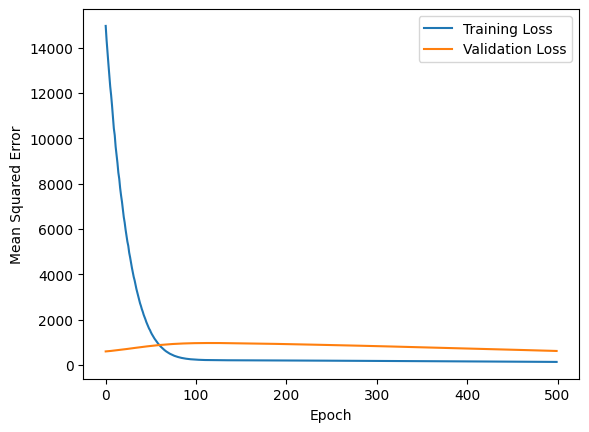

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset from the CSV file
dataset = np.loadtxt('celsius_to_fahrenheit_dataset.csv', delimiter=',')

# Split the dataset into features (X) and labels (y)
X = dataset[:, 0]  # Celsius values
y = dataset[:, 1]  # Fahrenheit values

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(1, input_shape=[1])  # Single neuron, single layer
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Display the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


## P1:
Good. Now, we will use a certain value of degrees in celsius (this value shouldn't exist in our dataset), and ask our model to predict the corresponding fahrenheit value. We will print the fahrenheit output

In [9]:
# Choose a new Celsius value for prediction
new_celsius_value = 100.0

# Reshape the input for prediction
new_celsius_value = np.array([new_celsius_value]).reshape(-1, 1)

# Use the trained model to predict the corresponding Fahrenheit value
predicted_fahrenheit = model.predict(new_celsius_value)

# Print the predicted Fahrenheit value
print(f"The predicted Fahrenheit value for {new_celsius_value[0, 0]} degrees Celsius is {predicted_fahrenheit[0, 0]}")


1/1 [==============================] - 0s 35ms/step
The predicted Fahrenheit value for 100.0 degrees Celsius is 229.93966674804688


## P1:
Good, now let's see the weights of our trained model

In [10]:
# Get the weights of the trained model
weights = model.get_weights()

# Print the weights
for layer_num, layer_weights in enumerate(weights):
    print(f"Layer {layer_num + 1} Weights:")
    print(layer_weights)
    print("------------------------")

Layer 1 Weights:
[[2.205747]]
------------------------
Layer 2 Weights:
[9.364974]
------------------------


## P1:
After testing our network, it's not working properly. It produces incorrect results.

I believe the problem is having a very small dataset on which the model is trained.
Let's go ahead and enlarge our dataset - let's make it at least 100 inputs long

In [11]:
import numpy as np

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (9/5) * celsius + 32

# Generating a larger dataset with at least 100 inputs
np.random.seed(42)  # Set seed for reproducibility
celsius_values_large = np.random.uniform(low=-100, high=100, size=(100,))
fahrenheit_values_large = celsius_to_fahrenheit(celsius_values_large)

# Storing the dataset as vectors
dataset_large = np.column_stack((celsius_values_large, fahrenheit_values_large))

# Save the larger dataset to a CSV file
np.savetxt('celsius_to_fahrenheit_dataset_large.csv', dataset_large, delimiter=',')

# Displaying the larger dataset
print("Celsius\tFahrenheit")
print("-------------------")
for c, f in dataset_large:
    print(f"{c}\t{f}")

print("Larger dataset saved to 'celsius_to_fahrenheit_dataset_large.csv'")


Celsius	Fahrenheit
-------------------
-25.091976230527507	-13.165557214949516
90.14286128198324	194.25715030756984
46.39878836228101	115.51781905210582
19.73169683940732	67.51705431093318
-68.79627191151269	-91.83328944072285
-68.80109593275947	-91.84197267896704
-88.3832775663601	-127.0898996194482
73.23522915498702	163.82341247897665
20.223002348641756	68.40140422755516
41.61451555920911	106.9061280065764
-95.88310114083951	-140.58958205351112
93.98197043239887	201.16754677831796
66.48852816008434	151.67935068815183
-57.53217786434477	-71.55792015582058
-63.635006558579875	-82.54301180544378
-63.31909802931324	-81.97437645276383
-39.15155140809246	-38.47279253456642
4.951286326447573	40.91231538760563
-13.610996271576852	7.500206711161667
-41.754171960391616	-43.15750952870491
22.370578944475895	72.26704210005661
-72.10122786959164	-97.78221016526496
-41.57107029295637	-42.827926527321466
-26.727631341261656	-16.109736414270984
-8.786003156592813	16.185194318132936
57.03519227860272

## No prompt
Just re-writing previous code to train a new model on the large dataset.

Epoch 1/500
60/60 [==============================] - 1s 6ms/step - loss: 27007.6992 - val_loss: 25047.2324
Epoch 2/500
60/60 [==============================] - 0s 4ms/step - loss: 20095.7012 - val_loss: 18120.9570
Epoch 3/500
60/60 [==============================] - 0s 4ms/step - loss: 14628.5146 - val_loss: 12754.4785
Epoch 4/500
60/60 [==============================] - 0s 4ms/step - loss: 10424.8027 - val_loss: 8718.8066
Epoch 5/500
60/60 [==============================] - 0s 3ms/step - loss: 7258.1357 - val_loss: 6205.0640
Epoch 6/500
60/60 [==============================] - 0s 4ms/step - loss: 5074.0767 - val_loss: 4081.9507
Epoch 7/500
60/60 [==============================] - 0s 2ms/step - loss: 3529.6130 - val_loss: 2736.8159
Epoch 8/500
60/60 [==============================] - 0s 3ms/step - loss: 2506.7900 - val_loss: 1949.3617
Epoch 9/500
60/60 [==============================] - 0s 2ms/step - loss: 1874.0251 - val_loss: 1418.9031
Epoch 10/500
60/60 [============================

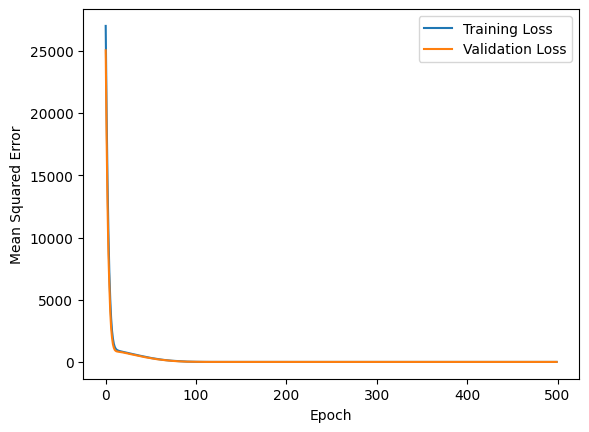

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset from the CSV file
dataset = np.loadtxt('celsius_to_fahrenheit_dataset_large.csv', delimiter=',')

# Split the dataset into features (X) and labels (y)
X = dataset[:, 0]  # Celsius values
y = dataset[:, 1]  # Fahrenheit values

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network model
model_new = keras.Sequential([
    layers.Dense(1, input_shape=[1])  # Single neuron, single layer
])

# Compile the model
model_new.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model_new.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model_new.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Display the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


## No prompt
Rewriting previous code to run a prediction through our model, and get the weights.

In [13]:
# Choose a new Celsius value for prediction (not present in the larger dataset)
new_celsius_value_large = 150.0

# Reshape the input for prediction
new_celsius_value_large = np.array([new_celsius_value_large]).reshape(-1, 1)

# Use the trained model to predict the corresponding Fahrenheit value
predicted_fahrenheit_large = model_new.predict(new_celsius_value_large)

# Print the predicted Fahrenheit value
print(f"The predicted Fahrenheit value for {new_celsius_value_large[0, 0]} degrees Celsius is {predicted_fahrenheit_large[0, 0]}")


1/1 [==============================] - 0s 115ms/step
The predicted Fahrenheit value for 150.0 degrees Celsius is 301.43310546875


In [14]:
# Get the weights of the trained model
weights = model_new.get_weights()

# Print the weights
for layer_num, layer_weights in enumerate(weights):
    print(f"Layer {layer_num + 1} Weights:")
    print(layer_weights)
    print("------------------------")

Layer 1 Weights:
[[1.7965027]]
------------------------
Layer 2 Weights:
[31.95771]
------------------------


These are pretty good results, almost landing at the exact expected weights (1.8 and 32).

## Re-running the experiment with an even larger dataset to try achieve perfect weights

In [15]:
import numpy as np

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(celsius):
    return (9/5) * celsius + 32

# Generating a larger dataset with at least 100 inputs
np.random.seed(42)  # Set seed for reproducibility
celsius_values_large = np.random.uniform(low=-100, high=100, size=(250,))
fahrenheit_values_large = celsius_to_fahrenheit(celsius_values_large)

# Storing the dataset as vectors
dataset_large = np.column_stack((celsius_values_large, fahrenheit_values_large))

# Save the larger dataset to a CSV file
np.savetxt('celsius_to_fahrenheit_dataset_final.csv', dataset_large, delimiter=',')

# Displaying the larger dataset
print("Celsius\tFahrenheit")
print("-------------------")
for c, f in dataset_large:
    print(f"{c}\t{f}")

print("Final dataset saved to 'celsius_to_fahrenheit_dataset_final.csv'")

Celsius	Fahrenheit
-------------------
-25.091976230527507	-13.165557214949516
90.14286128198324	194.25715030756984
46.39878836228101	115.51781905210582
19.73169683940732	67.51705431093318
-68.79627191151269	-91.83328944072285
-68.80109593275947	-91.84197267896704
-88.3832775663601	-127.0898996194482
73.23522915498702	163.82341247897665
20.223002348641756	68.40140422755516
41.61451555920911	106.9061280065764
-95.88310114083951	-140.58958205351112
93.98197043239887	201.16754677831796
66.48852816008434	151.67935068815183
-57.53217786434477	-71.55792015582058
-63.635006558579875	-82.54301180544378
-63.31909802931324	-81.97437645276383
-39.15155140809246	-38.47279253456642
4.951286326447573	40.91231538760563
-13.610996271576852	7.500206711161667
-41.754171960391616	-43.15750952870491
22.370578944475895	72.26704210005661
-72.10122786959164	-97.78221016526496
-41.57107029295637	-42.827926527321466
-26.727631341261656	-16.109736414270984
-8.786003156592813	16.185194318132936
57.03519227860272

Epoch 1/500
150/150 [==============================] - 1s 3ms/step - loss: 31507.4863 - val_loss: 22501.0781
Epoch 2/500
150/150 [==============================] - 0s 2ms/step - loss: 15061.2285 - val_loss: 9957.6279
Epoch 3/500
150/150 [==============================] - 0s 2ms/step - loss: 6493.9849 - val_loss: 4181.7783
Epoch 4/500
150/150 [==============================] - 0s 2ms/step - loss: 2765.1797 - val_loss: 1897.5975
Epoch 5/500
150/150 [==============================] - 0s 2ms/step - loss: 1416.9086 - val_loss: 1138.9613
Epoch 6/500
150/150 [==============================] - 0s 2ms/step - loss: 1012.2812 - val_loss: 932.8133
Epoch 7/500
150/150 [==============================] - 0s 2ms/step - loss: 899.8946 - val_loss: 869.7457
Epoch 8/500
150/150 [==============================] - 0s 2ms/step - loss: 849.7523 - val_loss: 829.6760
Epoch 9/500
150/150 [==============================] - 0s 2ms/step - loss: 816.1767 - val_loss: 793.4169
Epoch 10/500
150/150 [===================

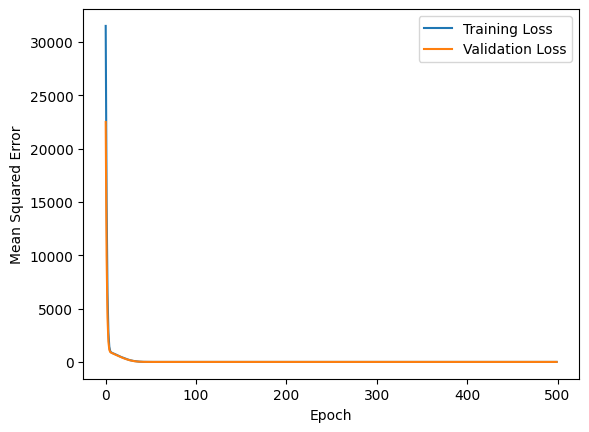

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset from the CSV file
dataset = np.loadtxt('celsius_to_fahrenheit_dataset_final.csv', delimiter=',')

# Split the dataset into features (X) and labels (y)
X = dataset[:, 0]  # Celsius values
y = dataset[:, 1]  # Fahrenheit values

# Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network model
model_final = keras.Sequential([
    layers.Dense(1, input_shape=[1])  # Single neuron, single layer
])

# Compile the model
model_final.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the model
history = model_final.fit(X_train, y_train, epochs=500, batch_size=1, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model_final.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Display the training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [17]:
# Choose a new Celsius value for prediction (not present in the larger dataset)
new_celsius_value_large = 150.0

# Reshape the input for prediction
new_celsius_value_large = np.array([new_celsius_value_large]).reshape(-1, 1)

# Use the trained model to predict the corresponding Fahrenheit value
predicted_fahrenheit_large = model_final.predict(new_celsius_value_large)

# Print the predicted Fahrenheit value
print(f"The predicted Fahrenheit value for {new_celsius_value_large[0, 0]} degrees Celsius is {predicted_fahrenheit_large[0, 0]}")

1/1 [==============================] - 0s 40ms/step
The predicted Fahrenheit value for 150.0 degrees Celsius is 302.0


In [19]:
# Get the weights of the trained model
weights = model_final.get_weights()

# Print the weights
for layer_num, layer_weights in enumerate(weights):
    print(f"Layer {layer_num + 1} Weights:")
    print(layer_weights)
    print("------------------------")

Layer 1 Weights:
[[1.8]]
------------------------
Layer 2 Weights:
[31.999998]
------------------------
